In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from fitter import Fitter, get_common_distributions

In [7]:
# reading data
#df = pd.read_csv('../github/hidden_features_df.csv', index_col="Unnamed: 0")
df = pd.read_csv('hidden_features_df.csv', index_col="Unnamed: 0")

In [8]:
# showing 5 first registers
df.head(5) 

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,8,0.0,11.246423,0.0,7.995950,9.410959,19.745337,9.010060,8.527996,10.110795,19.589340
1,8,0.0,13.312637,0.0,10.743755,11.378502,18.715256,11.810072,11.065614,12.528616,18.708977
2,5,0.0,0.000000,0.0,0.000000,0.000000,28.648830,0.000000,0.000000,0.000000,30.524609
3,5,0.0,0.000000,0.0,0.000000,0.000000,26.991035,0.000000,0.000000,0.000000,29.041384
4,8,0.0,5.038842,0.0,5.323320,5.368689,22.266983,4.806798,4.124915,4.903548,23.818264


In [9]:
# checking if feature_1 and feature_3 have all zeros
counts_feature1 = df.groupby('feature_1')['feature_1'].value_counts()
print(counts_feature1)

counts_feature3 = df.groupby('feature_3')['feature_3'].value_counts()
print(counts_feature3)

feature_1  feature_1
0.0        0.0          9370
Name: feature_1, dtype: int64
feature_3  feature_3
0.0        0.0          9370
Name: feature_3, dtype: int64


In [10]:
# dropping feature_1 and feature_3
df = df.drop(['feature_1', 'feature_3'], axis=1)

In [38]:
distributions_set.extend(['arcsine', 'cosine', 'expon', 'weibull_max', 'weibull_min', 
                          'dweibull', 't', 'pareto', 'exponnorm', 'lognorm',
                         "norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"])  

Fitting 26 distributions:  15%|██▊               | 4/26 [00:03<00:17,  1.23it/s]SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED gamma distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
SKIPPED powerlaw distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)
Fitting 26 distributions:  27%|████▊             | 7/26 [00:26<01:16,  4.01s/it]SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
Fitting 26 distributions:  35%|██████▏           | 9/26 [00:31<00:53,  3.16s/it]SKIPPED lognorm distribution (taking more than 30 seconds)
SKIPPED powerlaw distribution (taking more than 30 seconds)
Fitting 26 distributions: 100%|█████████████████| 26/26 [01:32<00:00,  3.56s/it]


Summary for feature_2:
{'expon': (0.0, 5.177616322469145), 'norm': (5.177616322469145, 5.190468910875648), 'uniform': (0.0, 17.499439239501953), 'rayleigh': (-3.6659599348139276, 7.250855416195648), 'cosine': (5.391957614716955, 4.12127613716813), 'cauchy': (3.2566900025320153, 4.371730981976283)}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,5.768899,670.851498,-69252.125478,inf,0.430843,0.0
uniform,6.108075,576.433767,-68716.812130,inf,0.431213,0.0
rayleigh,6.135162,654.244975,-68675.352344,inf,0.311122,0.0
cosine,6.147884,667.424704,-68655.942508,inf,0.293355,0.0
norm,6.160870,659.228214,-68636.171748,inf,0.272218,0.0


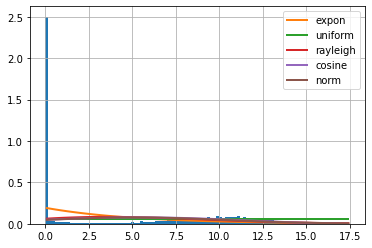

In [40]:
data = df['feature_2']
f = Fitter(data, distributions = distributions_set)
f.fit()
print(f"Summary for feature_2:")
print(f.fitted_param)
f.summary()


Fitting 26 distributions:  27%|████▊             | 7/26 [00:29<01:20,  4.25s/it]SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
Fitting 26 distributions:  38%|██████▌          | 10/26 [00:32<00:31,  1.98s/it]SKIPPED powerlaw distribution (taking more than 30 seconds)
SKIPPED gamma distribution (taking more than 30 seconds)
Fitting 26 distributions:  54%|█████████▏       | 14/26 [00:35<00:11,  1.05it/s]SKIPPED weibull_min distribution (taking more than 30 seconds)
SKIPPED weibull_max distribution (taking more than 30 seconds)
Fitting 26 distributions: 100%|█████████████████| 26/26 [01:34<00:00,  3.63s/it]


Summary for feature_4:
{'expon': (0.0, 4.687327256145526), 'norm': (4.687327256145526, 4.6551625088416415), 'uniform': (0.0, 13.632644653320312), 'rayleigh': (-3.294853623007078, 6.533978480651519), 'cauchy': (3.330458374597489, 4.120486375285525), 'cosine': (4.81983399047898, 3.6553887370450395)}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,9.949162,603.812978,-64145.408276,1.610955,0.437887,0.0
uniform,10.356803,526.493452,-63769.153253,1.035554,0.438266,0.0
rayleigh,10.474497,585.648313,-63663.273836,1.294722,0.318909,0.0
cosine,10.492653,578.599237,-63647.046536,1.143291,0.302367,0.0
norm,10.510265,587.759587,-63631.331815,1.178638,0.281526,0.0


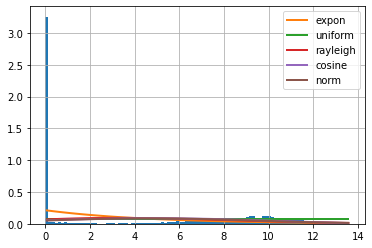

In [41]:
data = df['feature_4']
f = Fitter(data, distributions = distributions_set)
f.fit()
print(f"Summary for feature_4:")
print(f.fitted_param)
f.summary()

Fitting 26 distributions:  54%|█████████▏       | 14/26 [00:34<00:13,  1.15s/it]SKIPPED weibull_max distribution (taking more than 30 seconds)
SKIPPED weibull_min distribution (taking more than 30 seconds)
Fitting 26 distributions:  62%|██████████▍      | 16/26 [00:57<00:52,  5.27s/it]SKIPPED dweibull distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)
Fitting 26 distributions: 100%|█████████████████| 26/26 [01:33<00:00,  3.60s/it]


Summary for feature_5:
{'expon': (0.0, 4.82584619277466), 'norm': (4.82584619277466, 4.802611057642666), 'uniform': (0.0, 16.026649475097656), 'rayleigh': (-3.3809785645169734, 6.723728339540737), 'cosine': (4.999076193532881, 3.796581660350202), 'cauchy': (3.2048828022600455, 4.126670628323804)}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,6.666467,650.897515,-67897.140932,inf,0.423479,0.0
uniform,7.053406,558.850586,-67368.478966,inf,0.423520,0.0
rayleigh,7.092666,633.912162,-67316.470186,inf,0.304738,0.0
cosine,7.107271,645.144818,-67297.195454,inf,0.287192,0.0
norm,7.122528,638.460049,-67277.102784,inf,0.266108,0.0


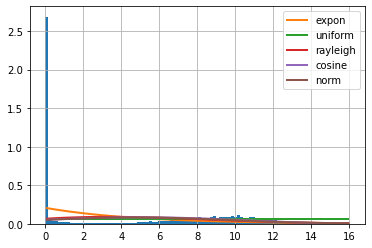

In [42]:
data = df['feature_5']
f = Fitter(data, distributions = distributions_set)
f.fit()
print(f"Summary for feature_5:")
print(f.fitted_param)
f.summary()

Fitting 26 distributions:  35%|██████▏           | 9/26 [00:32<00:40,  2.41s/it]SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED powerlaw distribution (taking more than 30 seconds)
Fitting 26 distributions:  62%|██████████▍      | 16/26 [01:01<00:58,  5.82s/it]SKIPPED dweibull distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)
Fitting 26 distributions: 100%|█████████████████| 26/26 [01:33<00:00,  3.61s/it]


Summary for feature_6:
{'expon': (9.597055435180664, 12.02737988753914), 'norm': (21.624435322719805, 5.569280754178957), 'uniform': (9.597055435180664, 27.957197189331055), 'rayleigh': (11.256169802575599, 8.322193761715697), 'cauchy': (19.864655259064246, 3.853070806579253)}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rayleigh,0.026790,inf,-119589.737658,inf,0.077392,2.932689e-49
norm,0.041900,753.489106,-115398.931565,inf,0.109104,1.360736e-97
cauchy,0.052617,789.561535,-113264.827672,inf,0.149465,3.402911e-183
uniform,0.074039,670.134934,-110064.532991,inf,0.186886,5.629114e-287
expon,0.107427,733.883422,-106576.806050,inf,0.273142,0.000000e+00


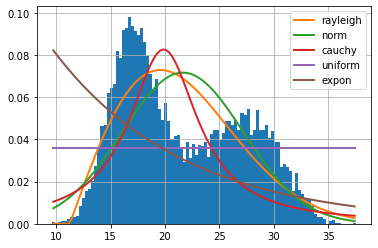

In [ ]:
data = df['feature_6']
f = Fitter(data, distributions = distributions_set)
f.fit()
print(f"Summary for feature_6:")
print(f.fitted_param)
f.summary()

Fitting 26 distributions:  23%|███▉             | 6/26 [17:16<58:03, 174.15s/it]SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
Fitting 26 distributions:  73%|████████████▍    | 19/26 [17:50<00:28,  4.05s/it]SKIPPED exponnorm distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
Fitting 26 distributions: 100%|█████████████████| 26/26 [18:20<00:00, 42.33s/it]


Summary for feature_7:
{'expon': (0.0, 4.836745071614692), 'norm': (4.836745071614692, 4.8372554607217095), 'uniform': (0.0, 14.489505767822266), 'rayleigh': (-3.4317138298369905, 6.773715856060009), 'cosine': (4.99752068839542, 3.811835844660627), 'cauchy': (3.2013191845491207, 4.184804497876527)}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,8.896867,618.819815,-65192.872853,1.620386,0.442263,0.0
uniform,9.286108,538.684929,-64791.646063,1.046976,0.442330,0.0
rayleigh,9.378568,600.278749,-64698.812402,1.291129,0.321892,0.0
cosine,9.395424,594.195080,-64681.986565,1.132458,0.304816,0.0
norm,9.411526,602.600750,-64665.941681,1.172019,0.283660,0.0


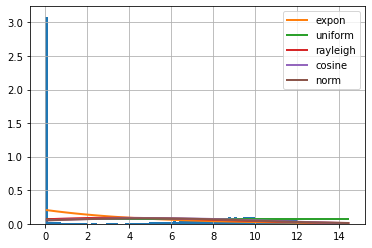

In [44]:
data = df['feature_7']
f = Fitter(data, distributions = distributions_set)
f.fit()
print(f"Summary for feature_7:")
print(f.fitted_param)
f.summary()

Fitting 26 distributions:  19%|███▍              | 5/26 [00:31<03:32, 10.11s/it]SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED exponpow distribution (taking more than 30 seconds)
Fitting 26 distributions:  54%|█████████▏       | 14/26 [00:36<00:10,  1.11it/s]SKIPPED weibull_max distribution (taking more than 30 seconds)
SKIPPED weibull_min distribution (taking more than 30 seconds)
Fitting 26 distributions:  65%|███████████      | 17/26 [01:03<00:39,  4.44s/it]SKIPPED t distribution (taking more than 30 seconds)
SKIPPED pareto distribution (taking more than 30 seconds)
Fitting 26 distributions:  88%|███████████████  | 23/26 [01:33<00:26,  8.91s/it]SKIPPED weibull_min distribution (taking more than 30 seconds)
SKIPPED pareto distribution (taking more than 30 seconds)
Fitting 26 distributions: 100%|█████████████████| 26/26 [01:35<00:00,  3.68s/it]


Summary for feature_8:
{'expon': (0.0, 4.5356024674272115), 'norm': (4.5356024674272115, 4.5602582676747225), 'uniform': (0.0, 13.84585952758789), 'rayleigh': (-3.2389147577476294, 6.37334580704813), 'cosine': (4.708639155502569, 3.6074969627896976)}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,9.827510,611.662155,-64260.684690,1.635899,0.443109,0.0
uniform,10.274466,529.597247,-63843.942773,1.026682,0.443118,0.0
rayleigh,10.366565,592.954072,-63760.326094,1.288304,0.321979,0.0
cosine,10.385668,587.350389,-63743.075071,1.123231,0.304641,0.0
norm,10.403640,595.482796,-63726.874869,1.165306,0.283435,0.0


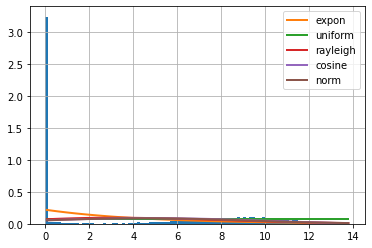

In [45]:
data = df['feature_8']
f = Fitter(data, distributions = distributions_set)
f.fit()
print(f"Summary for feature_8:")
print(f.fitted_param)
f.summary()

Fitting 26 distributions:  35%|██████▏           | 9/26 [00:33<00:42,  2.50s/it]SKIPPED lognorm distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)
Fitting 26 distributions:  62%|██████████▍      | 16/26 [01:03<01:00,  6.10s/it]SKIPPED dweibull distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)
Fitting 26 distributions: 100%|█████████████████| 26/26 [01:37<00:00,  3.75s/it]


Summary for feature_9:
{'expon': (0.0, 5.274831949535801), 'norm': (5.274831949535801, 5.278918732910998), 'uniform': (0.0, 16.102096557617188), 'rayleigh': (-3.7375904884072737, 7.385483775238371), 'cosine': (5.457643263522246, 4.162364260802759)}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,7.059272,641.852105,-67360.690033,inf,0.438207,0.0
uniform,7.386787,559.789897,-66935.752602,inf,0.438328,0.0
rayleigh,7.454857,623.164770,-66849.801580,inf,0.318136,0.0
cosine,7.469450,618.435229,-66831.477558,inf,0.300873,0.0
norm,7.482495,625.716211,-66815.127863,inf,0.279549,0.0


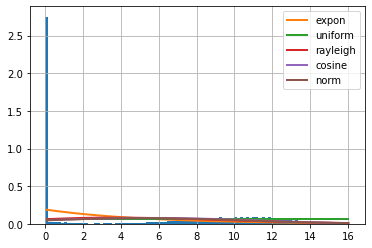

In [46]:
data = df['feature_9']
f = Fitter(data, distributions = distributions_set)
f.fit()
print(f"Summary for feature_9:")
print(f.fitted_param)
f.summary()

Fitting 26 distributions:  23%|████▏             | 6/26 [00:31<02:15,  6.77s/it]SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
Fitting 26 distributions:  54%|█████████▏       | 14/26 [00:36<00:12,  1.07s/it]SKIPPED weibull_max distribution (taking more than 30 seconds)
SKIPPED weibull_min distribution (taking more than 30 seconds)
Fitting 26 distributions:  62%|██████████▍      | 16/26 [01:02<01:01,  6.11s/it]SKIPPED t distribution (taking more than 30 seconds)
SKIPPED pareto distribution (taking more than 30 seconds)
Fitting 26 distributions: 100%|█████████████████| 26/26 [01:34<00:00,  3.65s/it]


Summary for feature_10:
{'expon': (9.284360885620115, 12.800228708607156), 'norm': (22.08458959422727, 5.768851631742144), 'uniform': (9.284360885620115, 28.046377182006836), 'rayleigh': (13.575004284533225, 7.269549205143836), 'cosine': (22.383381795787525, 4.833718243842566)}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cosine,0.026087,756.661160,-119838.964674,0.088077,0.102800,1.152211e-86
norm,0.030914,739.723787,-118248.080451,0.119862,0.091792,3.738820e-69
rayleigh,0.044418,inf,-114851.997585,0.171156,0.147782,4.416318e-179
uniform,0.057982,670.771894,-112355.153724,0.611426,0.156117,6.474937e-200
expon,0.097051,733.001014,-107528.598340,0.870759,0.271159,0.000000e+00


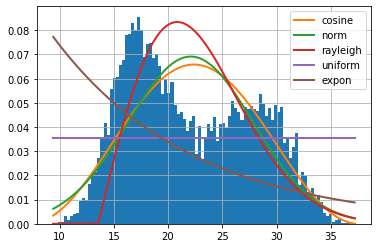

In [47]:
data = df['feature_10']
f = Fitter(data, distributions = distributions_set)
f.fit()
print(f"Summary for feature_10:")
print(f.fitted_param)
f.summary()